<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/air_passenger_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

In [3]:
# Step 3: Basic inspection
print("First 5 rows:")
print(df.head())

print("\nData types and nulls:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

First 5 rows:
     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

Data types and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None

Missing values:
Month         0
Passengers    0
dtype: int64


In [4]:
# Step 4: Convert 'Month' to datetime and set it as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [5]:
# Step 5: Rename column for clarity
df.rename(columns={'Passengers': 'AirPassengers'}, inplace=True)

In [6]:
# Step 6: Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df[~df.duplicated()]


Duplicate rows: 26


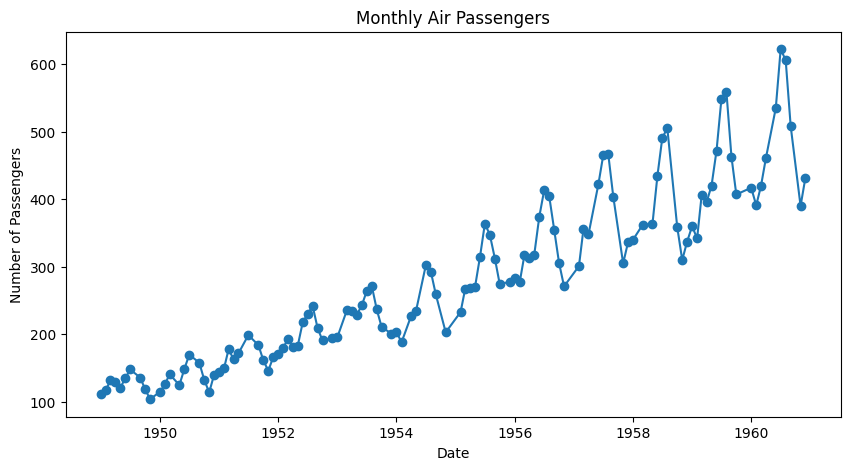

In [7]:
# Step 7: Plot before cleaning (if any cleaning needed)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['AirPassengers'], marker='o')
plt.title('Monthly Air Passengers')
plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.show()

In [8]:
# Step 8: Detect outliers using IQR (Interquartile Range)
Q1 = df['AirPassengers'].quantile(0.25)
Q3 = df['AirPassengers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 9: Outlier rows
outliers = df[(df['AirPassengers'] < lower_bound) | (df['AirPassengers'] > upper_bound)]
print("\nDetected outliers:")
print(outliers)


Detected outliers:
Empty DataFrame
Columns: [AirPassengers]
Index: []



Final cleaned dataset:
            AirPassengers
Month                    
1949-01-01            112
1949-02-01            118
1949-03-01            132
1949-04-01            129
1949-05-01            121


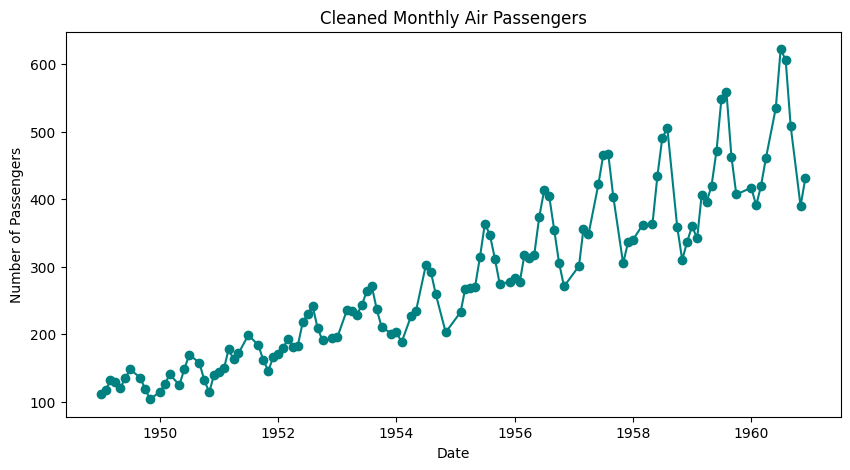

In [9]:
print("\nFinal cleaned dataset:")
print(df.head())

# Final plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['AirPassengers'], marker='o', color='teal')
plt.title('Cleaned Monthly Air Passengers')
plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.show()